In [2]:
# imports
import pandas as pd
import matplotlib.pyplot

In [3]:
# read files 
private_data_original = pd.read_csv('../data/private_dataB.csv')
public_data_register = pd.read_csv('../data/public_data_registerB.csv')
public_data_results = pd.read_csv('../data/public_data_resultsB.csv')

In [32]:
# read anony
anonymized_data = pd.read_csv('../kanon2.csv')
anonymized_data = anonymized_data[['party', 'sex', 'zip', 'age', 'citizenship']]

In [33]:
anonymized_data.head()

,party,sex,zip,age,citizenship
0,Red,Female,2300.0,4.0,Denmark
1,Red,Female,2200.0,4.0,Denmark
2,Green,Female,2100.0,2.0,Denmark
3,Green,Male,2400.0,3.0,Denmark
4,Green,Male,2200.0,1.0,Denmark


In [34]:
anonymized_data[anonymized_data['zip'].isna()]

,party,sex,zip,age,citizenship
81,Green,Female,NaN,4.0,Other
120,Green,Male,NaN,2.0,Other
183,Red,Female,NaN,4.0,Other
192,Red,Female,NaN,4.0,Other


In [35]:
anonymized_data.describe()

,zip,age
count,196.000000,179.000000
mean,2266.326531,2.614525
std,106.162795,0.931358
min,2100.000000,1.000000
25%,2200.000000,2.000000
50%,2300.000000,3.000000
75%,2400.000000,3.000000
max,2400.000000,4.000000


In [36]:
anonymized_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   party        200 non-null    object 
 1   sex          200 non-null    object 
 2   zip          196 non-null    float64
 3   age          179 non-null    float64
 4   citizenship  199 non-null    object 
dtypes: float64(2), object(3)
memory usage: 7.9+ KB


In [37]:
anonymized_data['age'].value_counts()

3.0    73
2.0    50
4.0    31
1.0    25
Name: age, dtype: int64

## Doin transforms you know they did too

In [39]:
public_data_register.head()

,Unnamed: 0,name,sex,dob,zip,citizenship,marital_status,last_voted,public_age,encoded_age,encoded_citizenship
0,0,"Le, Ian",Male,1998-08-30,2300,Denmark,Never married,1,22,1,Denmark
1,1,"Wang, Caleb",Male,1996-04-23,2200,Denmark,Never married,1,24,1,Denmark
2,2,"Carranco, Raquel",Female,1994-08-06,2200,Denmark,Never married,1,26,1,Denmark
3,3,"Williams, Geona",Female,1995-04-22,2100,Sweden,Never married,2,25,1,Other
4,4,"Gonzales, Edward",Male,2000-05-13,2100,Denmark,Never married,1,20,1,Denmark


In [40]:
# age calc the same way
public_data_register['public_age'] = public_data_register['dob'].apply(lambda x: 2020 - int(x[:4]))

In [41]:
public_data_register

,Unnamed: 0,name,sex,dob,zip,citizenship,marital_status,last_voted,public_age,encoded_age,encoded_citizenship
0,0,"Le, Ian",Male,1998-08-30,2300,Denmark,Never married,1,22,1,Denmark
1,1,"Wang, Caleb",Male,1996-04-23,2200,Denmark,Never married,1,24,1,Denmark
2,2,"Carranco, Raquel",Female,1994-08-06,2200,Denmark,Never married,1,26,1,Denmark
3,3,"Williams, Geona",Female,1995-04-22,2100,Sweden,Never married,2,25,1,Other
4,4,"Gonzales, Edward",Male,2000-05-13,2100,Denmark,Never married,1,20,1,Denmark
...,...,...,...,...,...,...,...,...,...,...,...
1510,1510,"Stapleton, Samantha",Female,1935-02-06,2400,Denmark,Married/separated,0,85,4,Denmark
1511,1511,"Khabir, David",Male,1956-03-31,2300,Denmark,Married/separated,0,64,3,Denmark
1512,1512,"Richardson, Allison",Female,1952-01-09,2400,Denmark,Married/separated,2,68,4,Denmark
1513,1513,"Davis, Keith",Male,1929-01-27,2400,Denmark,Widowed,0,91,4,Denmark


In [42]:
citizenship_transformer = lambda x: "Denmark" if x == "Denmark" else "Other"
age_transformer = lambda x: 1 if x <= 30 else (2 if x <= 45 else (3 if x <= 65 else 4))

In [43]:
public_data_register['encoded_age'] = public_data_register['public_age'].apply(age_transformer)
public_data_register['encoded_citizenship'] = public_data_register['citizenship'].apply(citizenship_transformer)

In [46]:
public_data_register[public_data_register['encoded_age'] > 2].head()

,Unnamed: 0,name,sex,dob,zip,citizenship,marital_status,last_voted,public_age,encoded_age,encoded_citizenship
187,187,"Zheng, Brianne",Female,1974-07-27,2200,Denmark,Never married,1,46,3,Denmark
211,211,"Vardas, Jennifer",Female,1974-04-01,2400,Denmark,Married/separated,1,46,3,Denmark
230,230,"Abdalla, Ali",Female,1974-06-18,2100,Denmark,Divorced,1,46,3,Denmark
252,252,"Elwood, Sidney",Female,1974-06-15,2300,Denmark,Never married,1,46,3,Denmark
269,269,"Hesse, Shelby",Female,1974-12-13,2200,Denmark,Married/separated,2,46,3,Denmark


In [48]:
merged_df = public_data_register.merge(anonymized_data, on = 'sex', how = 'outer')

In [49]:
merged_df.head()

,Unnamed: 0,name,sex,dob,zip_x,citizenship_x,marital_status,last_voted,public_age,encoded_age,encoded_citizenship,party,zip_y,age,citizenship_y
0,0,"Le, Ian",Male,1998-08-30,2300,Denmark,Never married,1,22,1,Denmark,Green,2400.0,3.0,Denmark
1,0,"Le, Ian",Male,1998-08-30,2300,Denmark,Never married,1,22,1,Denmark,Green,2200.0,1.0,Denmark
2,0,"Le, Ian",Male,1998-08-30,2300,Denmark,Never married,1,22,1,Denmark,Red,2300.0,2.0,Denmark
3,0,"Le, Ian",Male,1998-08-30,2300,Denmark,Never married,1,22,1,Denmark,Red,2300.0,3.0,Denmark
4,0,"Le, Ian",Male,1998-08-30,2300,Denmark,Never married,1,22,1,Denmark,Red,2400.0,3.0,Denmark


In [52]:
merged_df['name'].value_counts().mean()

100.2420634920635

In [95]:
# compare filterer function
def citizenship_compare(x):
    if x[14] == x[10]:
        return True
    else:
        return False

def test(x):
    return x[15]

def pd_or(x):
    return x[15] or x[16]

In [103]:
# citizenship cleaning

merged_df['citizenship_na'] = merged_df['citizenship_y'].isna()
merged_df['citizenship_match'] = merged_df.apply(citizenship_compare, axis = 1)
merged_df['citizenship_stays'] = merged_df.apply(pd_or, axis = 1)

merged_df = merged_df[merged_df['citizenship_stays']]
del merged_df['citizenship_na']
del merged_df['citizenship_match']
del merged_df['citizenship_stays']

print(merged_df['name'].value_counts().mean())
merged_df.head()

85.45502645502646


,Unnamed: 0,name,sex,dob,zip_x,citizenship_x,marital_status,last_voted,public_age,encoded_age,encoded_citizenship,party,zip_y,age,citizenship_y
0,0,"Le, Ian",Male,1998-08-30,2300,Denmark,Never married,1,22,1,Denmark,Green,2400.0,3.0,Denmark
1,0,"Le, Ian",Male,1998-08-30,2300,Denmark,Never married,1,22,1,Denmark,Green,2200.0,1.0,Denmark
2,0,"Le, Ian",Male,1998-08-30,2300,Denmark,Never married,1,22,1,Denmark,Red,2300.0,2.0,Denmark
3,0,"Le, Ian",Male,1998-08-30,2300,Denmark,Never married,1,22,1,Denmark,Red,2300.0,3.0,Denmark
4,0,"Le, Ian",Male,1998-08-30,2300,Denmark,Never married,1,22,1,Denmark,Red,2400.0,3.0,Denmark


In [110]:
# zip filtering
def zip_compare(x):
    if x[12] == x[4]:
        return True
    else:
        return False

def test(x):
    return x[12]

def pd_or(x):
    return x[15] or x[16]


In [112]:
# zip cleaning

merged_df['zip_na'] = merged_df['zip_y'].isna()
merged_df['zip_match'] = merged_df.apply(zip_compare, axis = 1)
merged_df['zip_stays'] = merged_df.apply(pd_or, axis = 1)

merged_df = merged_df[merged_df['zip_stays']]
del merged_df['zip_na']
del merged_df['zip_match']
del merged_df['zip_stays']

print(merged_df['name'].value_counts().mean())
merged_df.head()

22.322089947089946


,Unnamed: 0,name,sex,dob,zip_x,citizenship_x,marital_status,last_voted,public_age,encoded_age,encoded_citizenship,party,zip_y,age,citizenship_y
2,0,"Le, Ian",Male,1998-08-30,2300,Denmark,Never married,1,22,1,Denmark,Red,2300.0,2.0,Denmark
3,0,"Le, Ian",Male,1998-08-30,2300,Denmark,Never married,1,22,1,Denmark,Red,2300.0,3.0,Denmark
6,0,"Le, Ian",Male,1998-08-30,2300,Denmark,Never married,1,22,1,Denmark,Green,2300.0,2.0,Denmark
16,0,"Le, Ian",Male,1998-08-30,2300,Denmark,Never married,1,22,1,Denmark,Green,2300.0,2.0,Denmark
18,0,"Le, Ian",Male,1998-08-30,2300,Denmark,Never married,1,22,1,Denmark,Red,2300.0,4.0,Denmark


<AxesSubplot:>

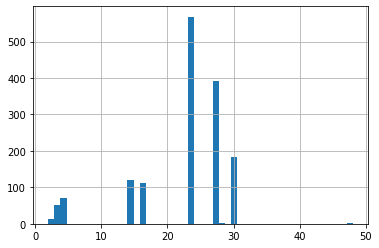

In [120]:
merged_df['name'].value_counts().hist(bins = 50)

In [125]:
# age filtering
def age_compare(x):
    if x[13] == x[7]:
        return True
    else:
        return False

def test(x):
    return x[13]

In [128]:
# age cleaning

merged_df['age_na'] = merged_df['age'].isna()
merged_df['age_match'] = merged_df.apply(age_compare, axis = 1)
merged_df['age_stays'] = merged_df.apply(pd_or, axis = 1)

merged_df = merged_df[merged_df['age_stays']]
del merged_df['age_na']
del merged_df['age_match']
del merged_df['age_stays']

print(merged_df['name'].value_counts().mean())
merged_df.head()

3.8702702702702703


,Unnamed: 0,name,sex,dob,zip_x,citizenship_x,marital_status,last_voted,public_age,encoded_age,encoded_citizenship,party,zip_y,age,citizenship_y
36,0,"Le, Ian",Male,1998-08-30,2300,Denmark,Never married,1,22,1,Denmark,Green,2300.0,NaN,Denmark
47,0,"Le, Ian",Male,1998-08-30,2300,Denmark,Never married,1,22,1,Denmark,Green,2300.0,NaN,Denmark
82,0,"Le, Ian",Male,1998-08-30,2300,Denmark,Never married,1,22,1,Denmark,Red,2300.0,NaN,Denmark
95,1,"Wang, Caleb",Male,1996-04-23,2200,Denmark,Never married,1,24,1,Denmark,Green,2200.0,1.0,Denmark
101,1,"Wang, Caleb",Male,1996-04-23,2200,Denmark,Never married,1,24,1,Denmark,Green,2200.0,1.0,Denmark


In [136]:
merged_df[['sex', 'encoded_citizenship', 'zip_y', 'age']].value_counts().min()

5